In [1]:
import iris
import iris.quickplot as qplt
import numpy as np
import matplotlib.pyplot as plt
iris.FUTURE.date_microseconds = True
iris.FUTURE.save_split_attrs = True

In [2]:
# change to your suite-id to pick up the required file
runid='du516'
datafile='/home/vagrant/cylc-run/u-'+runid+'/runN/work/1/atmos/atmosa.pl19810901_00'

In [3]:
# constraint on time to get 2nd radiation timestep
tconstr=iris.Constraint(time=lambda cell: cell.point.hour == 2)

In [4]:
# load all AOD components at 0.55 micron
aod=iris.load(datafile,[
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i285') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i300') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i301') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i302') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i303') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i304') & tconstr,
    iris.Constraint(pseudo_level=3) & iris.AttributeConstraint(STASH='m01s02i305') & tconstr])

/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/fileformats/rules.py:371: IrisUserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(


In [5]:
# make cube to store total AOD
aodsum=aod[0].copy()
aodsum.data=np.zeros(aodsum.data.shape)

# add-up components
aodsum.data=aod[0].data+aod[1].data+aod[2].data+aod[3].data+aod[4].data+aod[5].data+aod[6].data

# rename
aodsum.rename('atmosphere_optical_thickness_due_to_aerosol')

/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/coords.py:1980: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/coords.py:1980: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


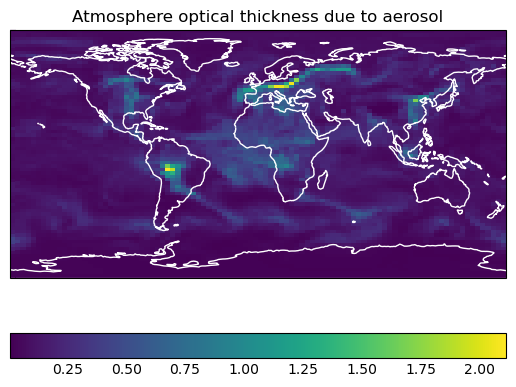

In [6]:
qplt.pcolormesh(aodsum)
plt.gca().coastlines(color='w')

In [7]:
# output to netCDF
iris.save(aodsum,'/home/vagrant/iris_Task062_AOD.nc',netcdf_format='NETCDF4')